In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

DATA_PATH = "../data/Housing.csv" # path per il dataset
sns.set_theme(style="whitegrid") # rendere i grafici più belli

print("✅ Importate librerie")

✅ Importate librerie


## Prima esplorazione
1. Che colonne ci sono nel dataset

In [34]:
df = pd.read_csv(DATA_PATH)

print(f"(righe, colonne) del dataset: {df.shape}\n")
print("Prime 5 righe del dataset:")
print(df.head())

(righe, colonne) del dataset: (545, 13)

Prime 5 righe del dataset:
      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  


## Controllo dati mancanti

In [36]:

# print(df.info())
# count conta quante righe, sum somma e True è 1, False è 0
dati_mancanti = df.isnull().sum()
# Conto quanti valori sono null per ogni colonna e stampo solo quelle problematiche
print("Stampo le colonne che hanno problemi: \n")
print(dati_mancanti[dati_mancanti > 0])

Stampo le colonne che hanno problemi: 

Series([], dtype: int64)


## Plotto il grafico con seaborn

### Distribuzione delle case in base al prezzo
La colonna che mi interessa analizzare è il prezzo df[`price`]

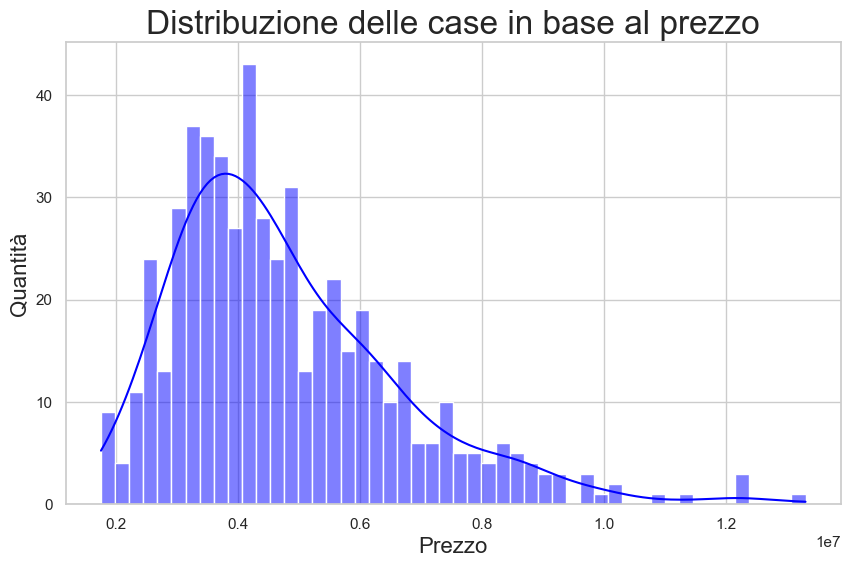

In [67]:
plt.figure(figsize=(10,6))
sns.histplot(
    data=df,
    x='price', # che colonna voglio usare: df['price']
    kde=True, # disegna la riga sovrapposta al grafico che ne aiuta la lettura
    bins=50, # numero di rettangoli in cui dividere la distribuzione
    color="blue"
    )
plt.title("Distribuzione delle case in base al prezzo", size=24)
plt.xlabel('Prezzo', size=16)
plt.ylabel('Quantità', size=16)
plt.show()

### Analisi:
Noto che ci sono molte più case economiche e poche ville milionarie (come mi aspetto)

## Calcolo la matrice di correlazione
Mi serve per vedere se ci sono correlazioni tra le varie colonne  
Se vicino a 1 allora fortemente correlato  
Se vicino a -1 allora fortmente correlato in senso negativo (uno sale uno scende)  
Se vicino a 0 non c'entra nulla  

In [70]:
# prendo solo i valori numerici, altrimenti corr() restituisce errore
correlation_matrix = df.corr(numeric_only=True)
print("Matrice di correlazione:\n")
print(correlation_matrix)

Matrice di correlazione:

              price      area  bedrooms  bathrooms   stories   parking
price      1.000000  0.535997  0.366494   0.517545  0.420712  0.384394
area       0.535997  1.000000  0.151858   0.193820  0.083996  0.352980
bedrooms   0.366494  0.151858  1.000000   0.373930  0.408564  0.139270
bathrooms  0.517545  0.193820  0.373930   1.000000  0.326165  0.177496
stories    0.420712  0.083996  0.408564   0.326165  1.000000  0.045547
parking    0.384394  0.352980  0.139270   0.177496  0.045547  1.000000


## Heatmap
Per leggere la matrice di correlazione in modo chiaro mi affido ad una heatmap

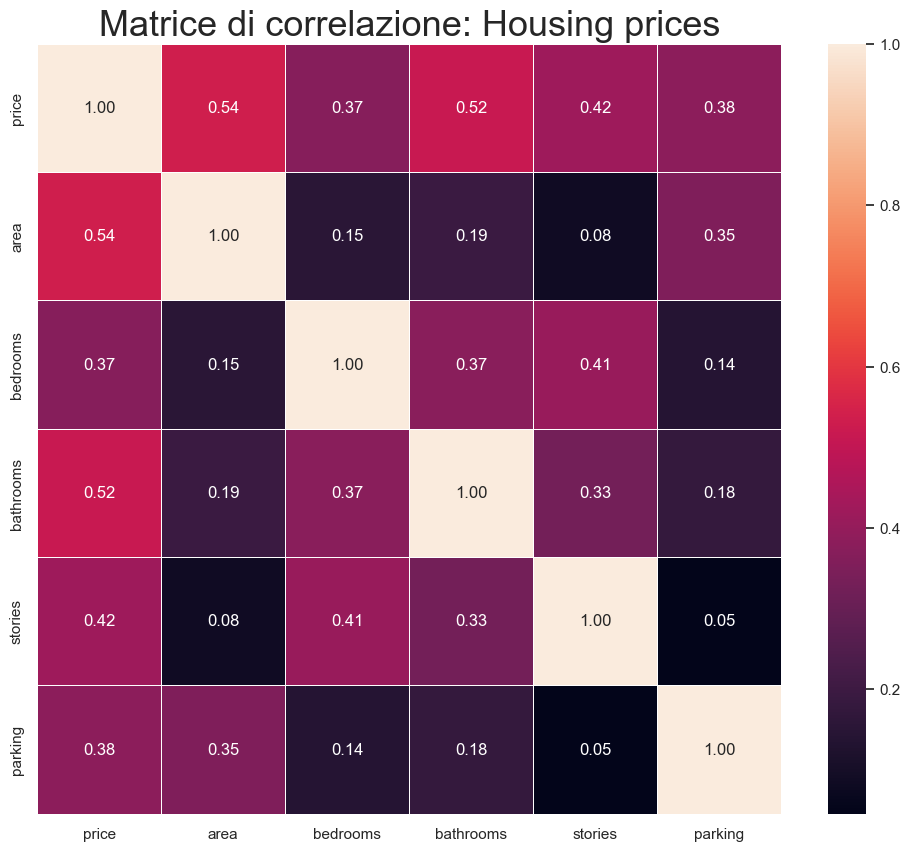

In [84]:
plt.figure(figsize=(12,10))
sns.heatmap(correlation_matrix,
            annot=True, # aggiunge i numeri nelle celle
            fmt=".2f", # approssima alla seconda cifra decimale
            linewidths=0.5 # aggiunge spazio tra le celle
            )
plt.title("Matrice di correlazione: Housing prices", size=26)
plt.show()